# PROJECT:
## Police Data

# INTRODUCTION;

This dataset contains information about 65,000 drivers collected from a police Database, including their offenses, search conducted and the action taken based on their stop outcome.
The country name column has no recorded values while other columns' names give self explanatory about the values stored in each of them. 

# QUESTION(S) FOR ANALYSIS:

Number of rows and columns present in the dataset.

what kind of properties associated with drivers that are arrested.



# DATA WRANGLING

In [1]:
# import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load dataset
df = pd.read_csv('3. Police Data.csv')
df.sample(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
32812,2/24/2009,15:13,NaN,F,1989.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
37440,9/20/2009,15:20,NaN,M,1974.0,35.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
59650,5/6/2012,13:40,NaN,M,1969.0,43.0,Asian,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
42924,6/8/2010,12:10,NaN,M,1981.0,29.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
61056,6/18/2012,10:04,NaN,M,1988.0,24.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


By looking at five random instances in the dataset, it was shown that some of the attributes values were repetitive, which means that they are probably a categorical attribute. 

#### Check for the number of duplicates that exit in the dataset.

In [3]:
df.duplicated().sum()

321

#### Check the rows with duplicated values

In [4]:
df[df.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,7/19/2005,0:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,10/3/2005,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,10/4/2005,0:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,10/5/2005,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,10/8/2005,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64677,10/27/2012,9:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
64886,11/9/2012,1:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65055,11/18/2012,0:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65073,11/18/2012,18:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


#### Let's find the shape of the dataset i.e the numbers of rows and columns in the dataset.

In [5]:
df.shape

(65535, 15)

#### The above result shows that:
1. The number of instances = 65535
2. The number of attributes = 15

#### We can take a look at all the features/attributes of the dataset by columns method

In [6]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

#### Let's find out the number of missing values in each attribute.

In [7]:
df.isna().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

The result shows that out of 15 attributes we have in the dataset, only 4 of them has no missing values, most of them have missing values in the range of 4060 to 4307 while one attribute (search_type) has almost all its values as missing values and one attribute (country_name) has no value at all. 

#### Visualization of columns containing null values and their percentage.

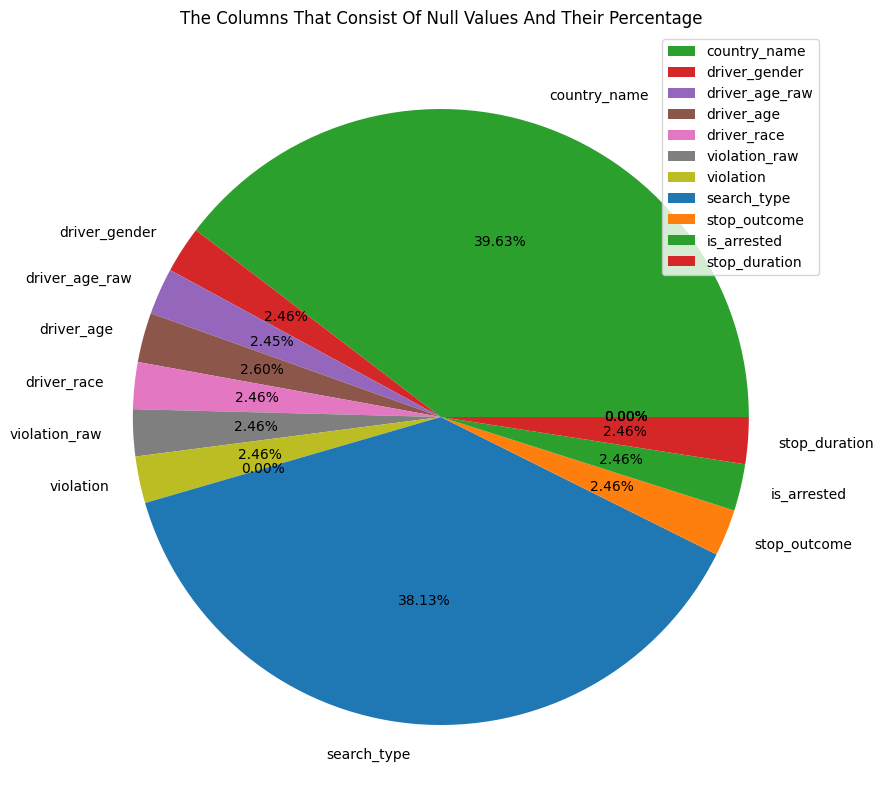

In [8]:
df.isna().sum().plot(kind = 'pie', figsize = (16,10), autopct = '%.2f%%');
plt.title("the columns that consist of null values and their percentage".title())
plt.legend()

The above visualization shows that the country name column consists the most null values followed by search type column while other columns consist the least null values compare to the two columns. 

#### Let's get a quick description of the data via the info() method which is useful for the task, in particular this method will return the total number of rows, and each attribute's type and number of non-null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

#### From the above method, I noticed the following:
#### 1. stop_date was recorded as an object datatype instead of datetime.
#### 2. Nothing was recorded in the country_name attribute as it returned 0 non-null value.

# DATA CLEANING

Let's make a copy of the dataset.

In [10]:
clean_data = df

### Explore the data after cleaning

In [11]:
clean_data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [12]:
clean_data.sample(10)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
53965,11/20/2011,1:37,NaN,M,1973.0,38.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
25177,4/16/2008,9:45,NaN,M,1962.0,46.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,30+ Min,False
17277,5/25/2007,14:35,NaN,M,1968.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
56876,2/19/2012,9:48,NaN,M,1983.0,29.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
11415,10/31/2006,14:06,NaN,F,1982.0,24.0,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
5517,4/9/2006,23:00,NaN,M,1968.0,38.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
23835,2/14/2008,20:39,NaN,M,1986.0,22.0,Hispanic,Registration Violation,Registration/plates,True,"Incident to Arrest,Inventory,Probable Cause",No Action,False,16-30 Min,True
63035,8/23/2012,13:46,NaN,M,1972.0,40.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
15929,4/6/2007,11:34,NaN,M,1974.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
17855,6/13/2007,17:17,NaN,F,1988.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Check if there's still duplicate values after cleaning

In [13]:
clean_data.duplicated().sum()

321

In [14]:
clean_data[clean_data.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,7/19/2005,0:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,10/3/2005,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,10/4/2005,0:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,10/5/2005,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,10/8/2005,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64677,10/27/2012,9:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
64886,11/9/2012,1:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65055,11/18/2012,0:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65073,11/18/2012,18:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [15]:
clean_data = clean_data.drop_duplicates()

In [16]:
clean_data.duplicated().sum()

0

In [17]:
rows, columns = clean_data.shape

In [18]:
print('The new number of rows is: ', rows)
print('The new number of columns is: ', columns)

The new number of rows is:  65214
The new number of columns is:  15


### Let's start fixing the wrong Datatype

In [19]:
clean_data.stop_date = pd.to_datetime(clean_data['stop_date'], errors = 'ignore')

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_5080\2116982338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.stop_date = pd.to_datetime(clean_data['stop_date'], errors = 'ignore')


In [20]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65214 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           65214 non-null  datetime64[ns]
 1   stop_time           65214 non-null  object        
 2   country_name        0 non-null      float64       
 3   driver_gender       61291 non-null  object        
 4   driver_age_raw      61298 non-null  float64       
 5   driver_age          61045 non-null  float64       
 6   driver_race         61292 non-null  object        
 7   violation_raw       61292 non-null  object        
 8   violation           61292 non-null  object        
 9   search_conducted    65214 non-null  bool          
 10  search_type         2470 non-null   object        
 11  stop_outcome        61292 non-null  object        
 12  is_arrested         61292 non-null  object        
 13  stop_duration       61292 non-null  object    

### Since there was no value in the country_name attribute, I think dropping it won't be an issue so, let's drop the column.

In [21]:
clean_data.drop('country_name', axis = 1, inplace = True,  errors = 'ignore')

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_5080\3223098991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop('country_name', axis = 1, inplace = True,  errors = 'ignore')


### So, let's now see if the changes have been reflected on our dataset by calling df.info() method once again.

In [22]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65214 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           65214 non-null  datetime64[ns]
 1   stop_time           65214 non-null  object        
 2   driver_gender       61291 non-null  object        
 3   driver_age_raw      61298 non-null  float64       
 4   driver_age          61045 non-null  float64       
 5   driver_race         61292 non-null  object        
 6   violation_raw       61292 non-null  object        
 7   violation           61292 non-null  object        
 8   search_conducted    65214 non-null  bool          
 9   search_type         2470 non-null   object        
 10  stop_outcome        61292 non-null  object        
 11  is_arrested         61292 non-null  object        
 12  stop_duration       61292 non-null  object        
 13  drugs_related_stop  65214 non-null  bool      

#### Wonderfull!!! We've made the changes.

### As I was said earlier that some values were repeated in some attributes so I want to find out what categories exit and how many districts belong to each category by using the value_counts() method and their visualizations.

In [23]:
clean_data.drugs_related_stop.value_counts()

False    64697
True       517
Name: drugs_related_stop, dtype: int64

In [24]:
# Creating a pieplot function 
def piePlot(count, x, explode):
    plt.rcParams["figure.figsize"] = [7.50, 5.50]
    total_count = count.sum()
    labels = x.index
    return plt.pie(count, explode = explode, labels = labels, autopct = lambda i : '{:.0f}'.format(i * total_count / 100),
                  shadow = False, startangle = 90)


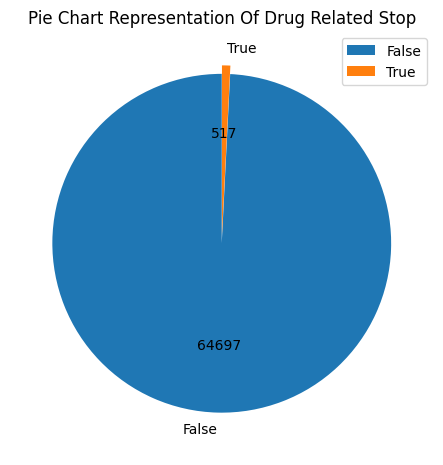

In [25]:
x = clean_data.drugs_related_stop.value_counts()
count = x.values
explode = [0,0.05]
piePlot(count, x , explode); # Calling the function
plt.title('pie chart representation of drug related stop'.title())
plt.legend();

In [26]:
# Counting the number of each driver race present in the dataset
clean_data["driver_race"].value_counts()

White       45610
Black        8243
Hispanic     5593
Asian        1636
Other         210
Name: driver_race, dtype: int64

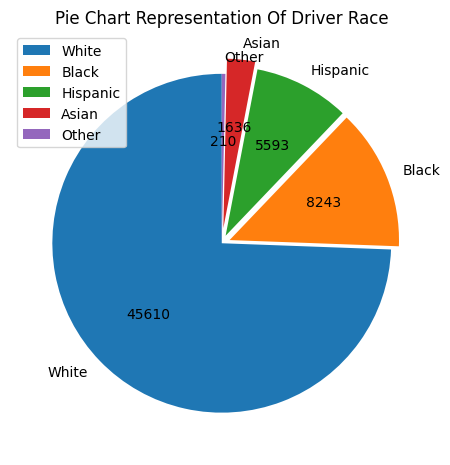

In [27]:
x = clean_data.driver_race.value_counts()
count = x.values
explode = [0,0.05,0.05,0.09,0]
piePlot(count, x , explode); # calling the function
plt.title('pie chart representation of driver race'.title())
plt.legend();

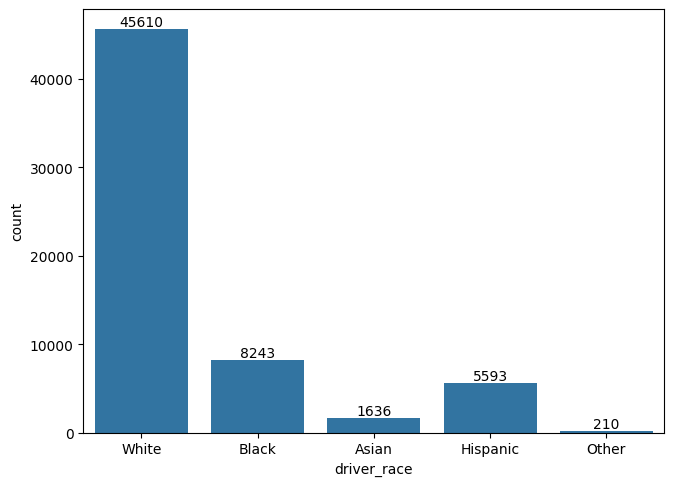

In [28]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = clean_data);
for label in ax.containers:
    ax.bar_label(label)

In [29]:
clean_data["violation"].value_counts()

Speeding               37103
Moving violation       11894
Equipment               6498
Other                   3569
Registration/plates     2225
Seat belt                  3
Name: violation, dtype: int64

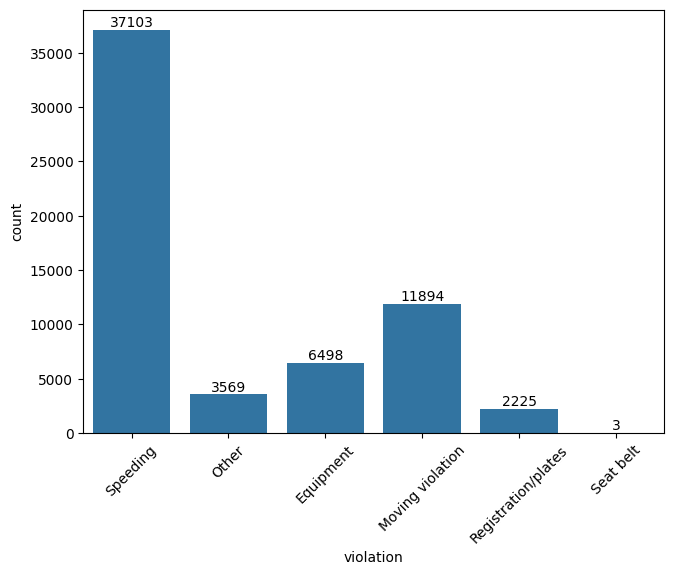

In [30]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "violation", color = color, data = clean_data);
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation = 45);

In [31]:
clean_data["violation_raw"].value_counts()

Speeding                            37103
Other Traffic Violation             11894
Equipment/Inspection Violation       6498
Special Detail/Directed Patrol       2380
Registration Violation               2225
Call for Service                      783
Violation of City/Town Ordinance      170
Motorist Assist/Courtesy              137
APB                                    51
Suspicious Person                      38
Warrant                                10
Seatbelt Violation                      3
Name: violation_raw, dtype: int64

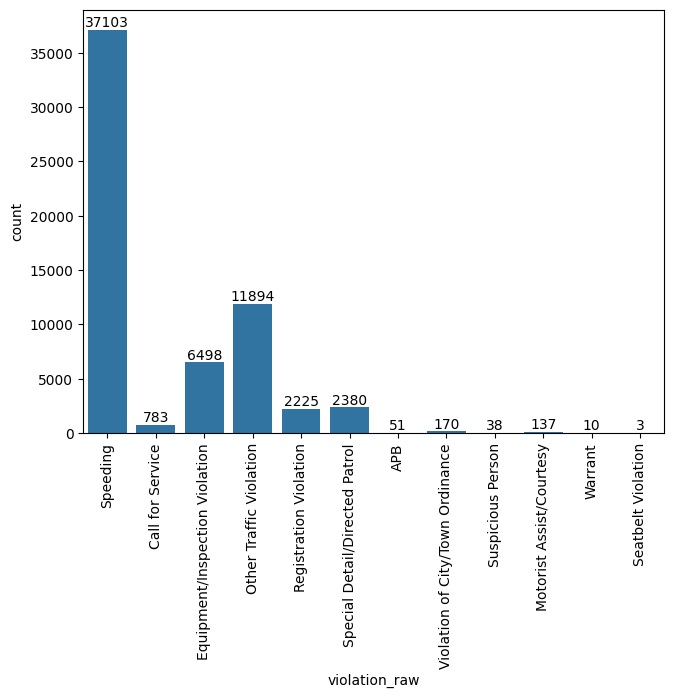

In [32]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "violation_raw", color = color, data = clean_data);
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation = 90);

In [33]:
clean_data["stop_outcome"].value_counts()

Citation            56411
Arrest Driver        1982
Warning              1887
N/D                   423
No Action             338
Arrest Passenger      251
Name: stop_outcome, dtype: int64

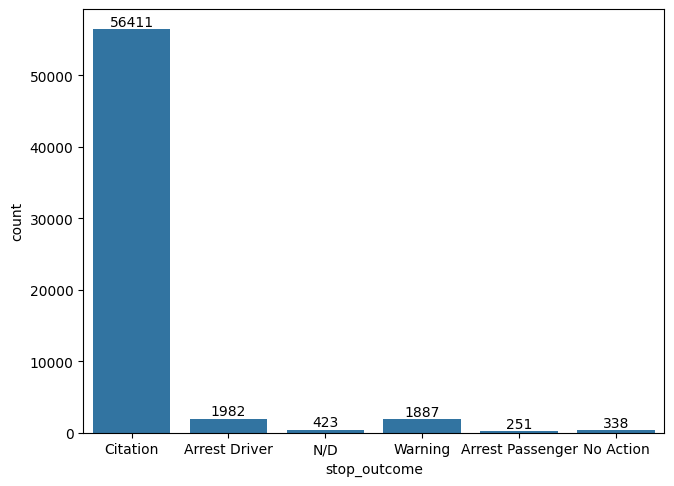

In [34]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "stop_outcome", color = color, data = clean_data);
for label in ax.containers:
    ax.bar_label(label)

In [35]:
clean_data["stop_duration"].value_counts()

0-15 Min     47264
16-30 Min    11403
30+ Min       2624
2                1
Name: stop_duration, dtype: int64

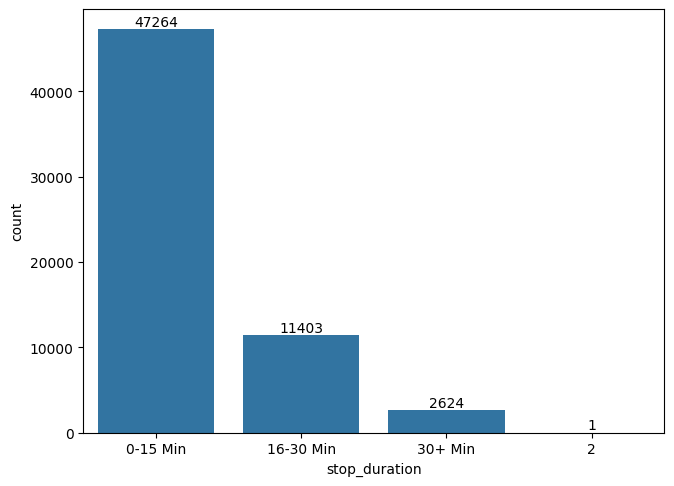

In [36]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "stop_duration", color = color, data = clean_data);
for label in ax.containers:
    ax.bar_label(label)

In [37]:
clean_data[clean_data['drugs_related_stop'] == True]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
40,2005-10-01,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
41,2005-10-01,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
118,2005-10-04,1:20,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,True
139,2005-10-05,0:20,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,16-30 Min,True
219,2005-10-07,23:30,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,16-30 Min,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64858,2012-11-06,22:45,M,1988.0,24.0,Black,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,16-30 Min,True
65033,2012-11-16,15:43,M,1985.0,27.0,White,Speeding,Speeding,True,Probable Cause,Citation,False,16-30 Min,True
65219,2012-11-23,20:03,M,1979.0,33.0,Black,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Probable Cause",Arrest Driver,True,30+ Min,True
65408,2012-11-30,22:37,F,1986.0,26.0,Hispanic,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,30+ Min,True


In [38]:
clean_data[clean_data['drugs_related_stop'] == True].driver_race.value_counts()

White       321
Black       127
Hispanic     62
Asian         7
Name: driver_race, dtype: int64

In [39]:
def addLabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i],y[i], horizontalalignment = 'center', fontsize = 10, fontstyle = 'oblique')

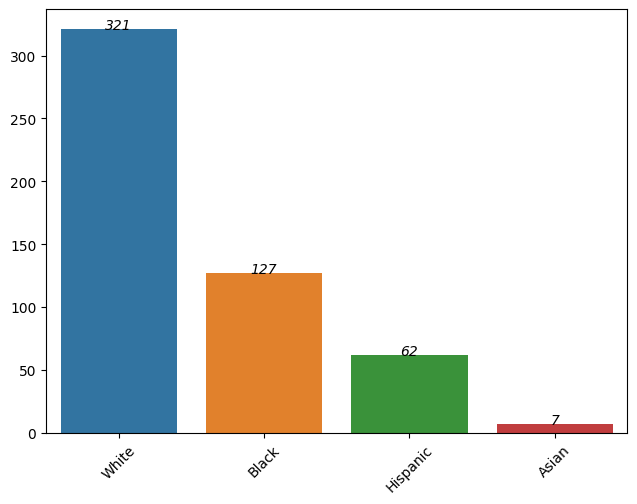

In [40]:
x_axis = clean_data[clean_data['drugs_related_stop'] == True].driver_race.value_counts().index
y_axis = clean_data[clean_data['drugs_related_stop'] == True].driver_race.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 45);
addLabels(x_axis, y_axis);

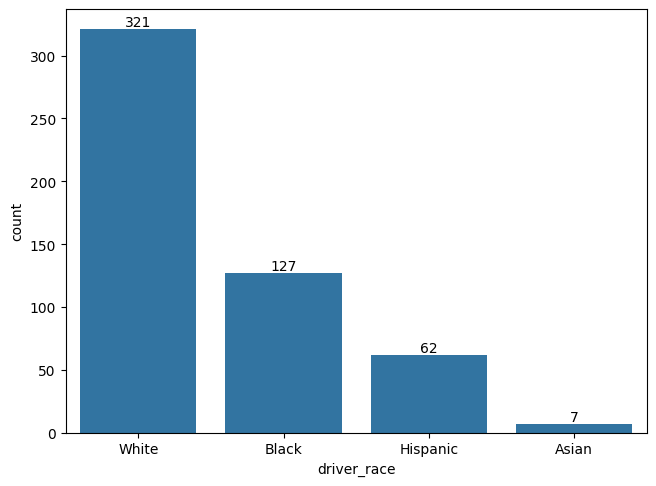

In [41]:
data = clean_data[clean_data['drugs_related_stop'] == True]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

In [42]:
clean_data[clean_data['drugs_related_stop'] == False].driver_race.value_counts()

White       45289
Black        8116
Hispanic     5531
Asian        1629
Other         210
Name: driver_race, dtype: int64

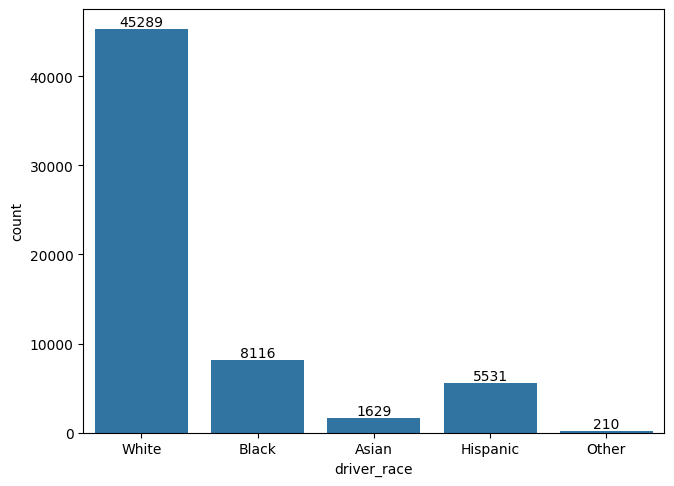

In [43]:
data = clean_data[clean_data['drugs_related_stop'] == False]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

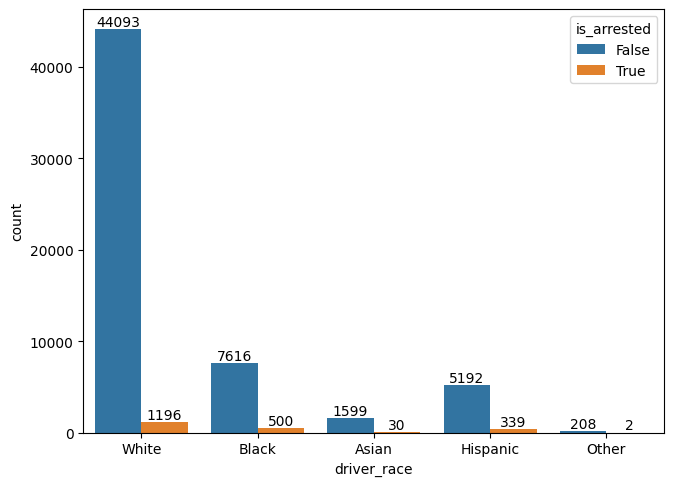

In [44]:
data = clean_data[clean_data['drugs_related_stop'] == False]
ax = sb.countplot(x = "driver_race", hue = 'is_arrested', data = data);
for label in ax.containers:
    ax.bar_label(label)

In [45]:
clean_data.driver_age.value_counts()

22.0    2903
21.0    2874
20.0    2772
23.0    2716
24.0    2575
        ... 
15.0       5
84.0       3
88.0       2
83.0       2
85.0       1
Name: driver_age, Length: 73, dtype: int64

Text(0, 0.5, 'Frequency')

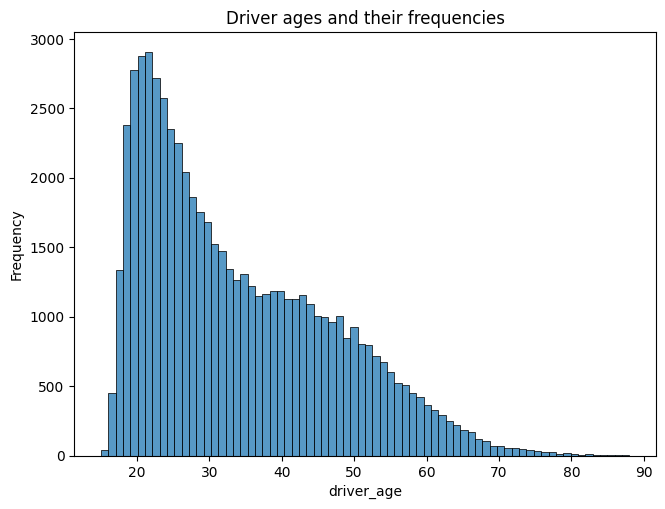

In [46]:
sb.histplot(clean_data, x = clean_data.driver_age);
plt.title("Driver ages and their frequencies")
plt.ylabel("Frequency")

In [47]:
clean_data[clean_data.is_arrested == True].driver_age.value_counts()

27.0    116
24.0    112
22.0    112
25.0    109
23.0    106
26.0    104
20.0    102
21.0    100
28.0     89
29.0     86
30.0     77
31.0     74
37.0     69
32.0     64
19.0     62
35.0     61
33.0     58
38.0     56
44.0     46
39.0     45
40.0     44
45.0     41
36.0     40
34.0     38
18.0     38
42.0     37
41.0     37
43.0     31
48.0     27
47.0     27
52.0     26
46.0     25
50.0     23
49.0     22
51.0     20
55.0     16
53.0     13
54.0     11
59.0      9
56.0      7
60.0      7
17.0      7
58.0      6
61.0      5
57.0      4
15.0      3
68.0      2
70.0      2
16.0      2
62.0      2
66.0      2
65.0      1
77.0      1
74.0      1
79.0      1
67.0      1
63.0      1
76.0      1
69.0      1
78.0      1
Name: driver_age, dtype: int64

Text(0, 0.5, 'Frequency')

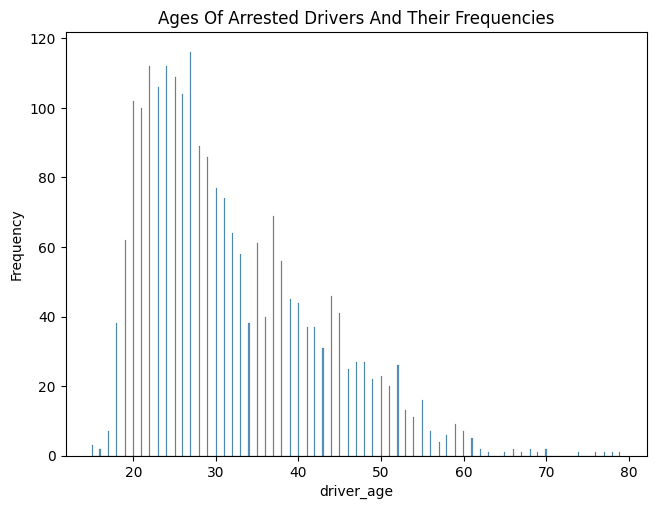

In [48]:
data = clean_data[clean_data.is_arrested == True]
sb.histplot(data, x = data.driver_age, bins = 500);
plt.title("Ages of arrested drivers and their frequencies".title())
plt.ylabel("Frequency")

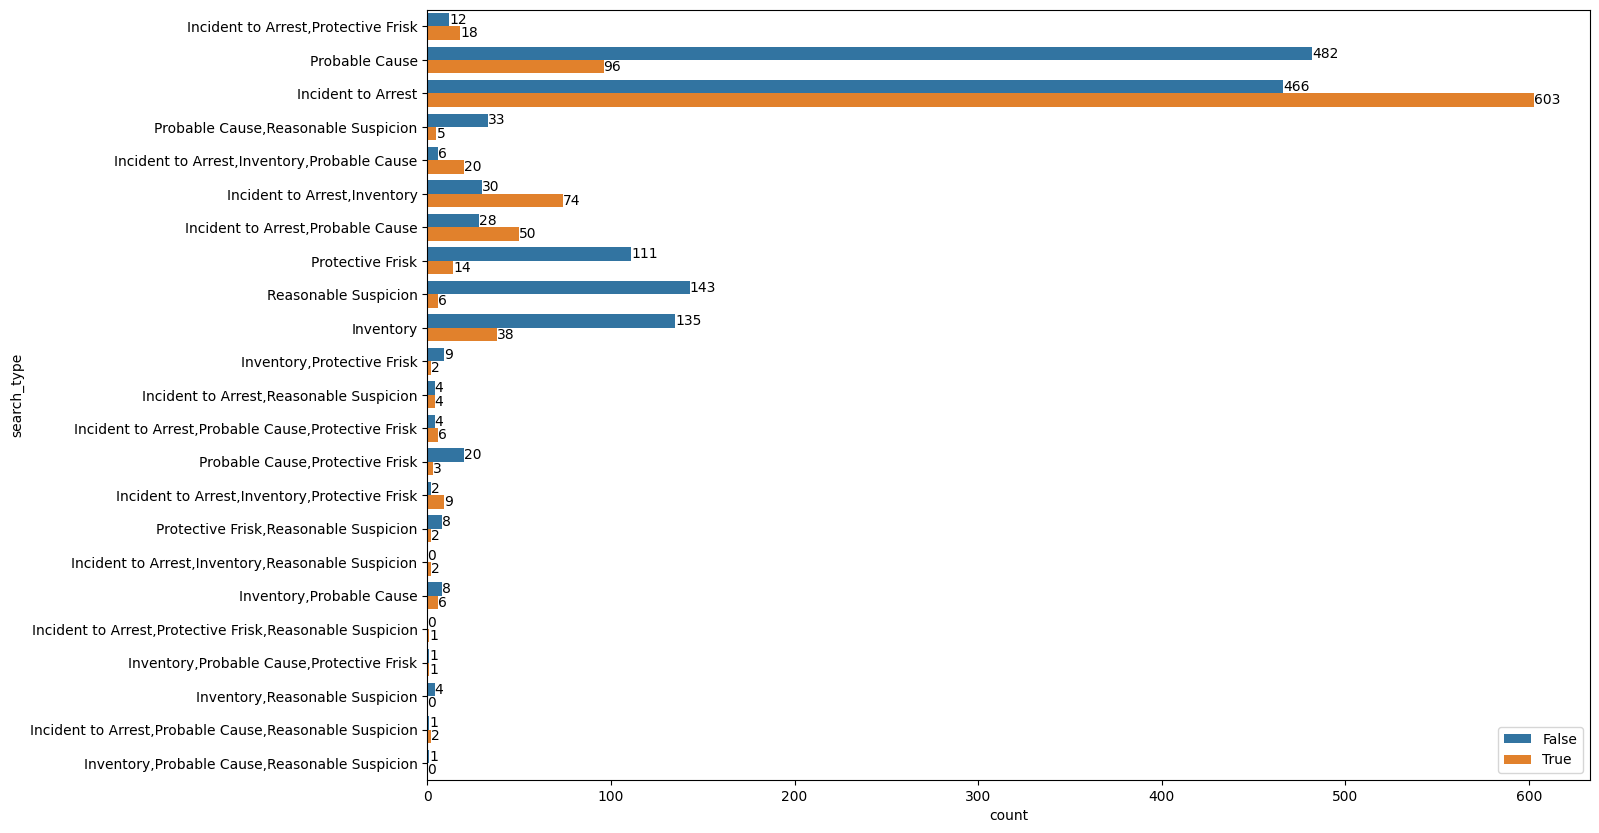

In [49]:
plt.figure(figsize = (15,10))
ax = sb.countplot(y = "search_type",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 4)
for label in ax.containers:
    ax.bar_label(label)

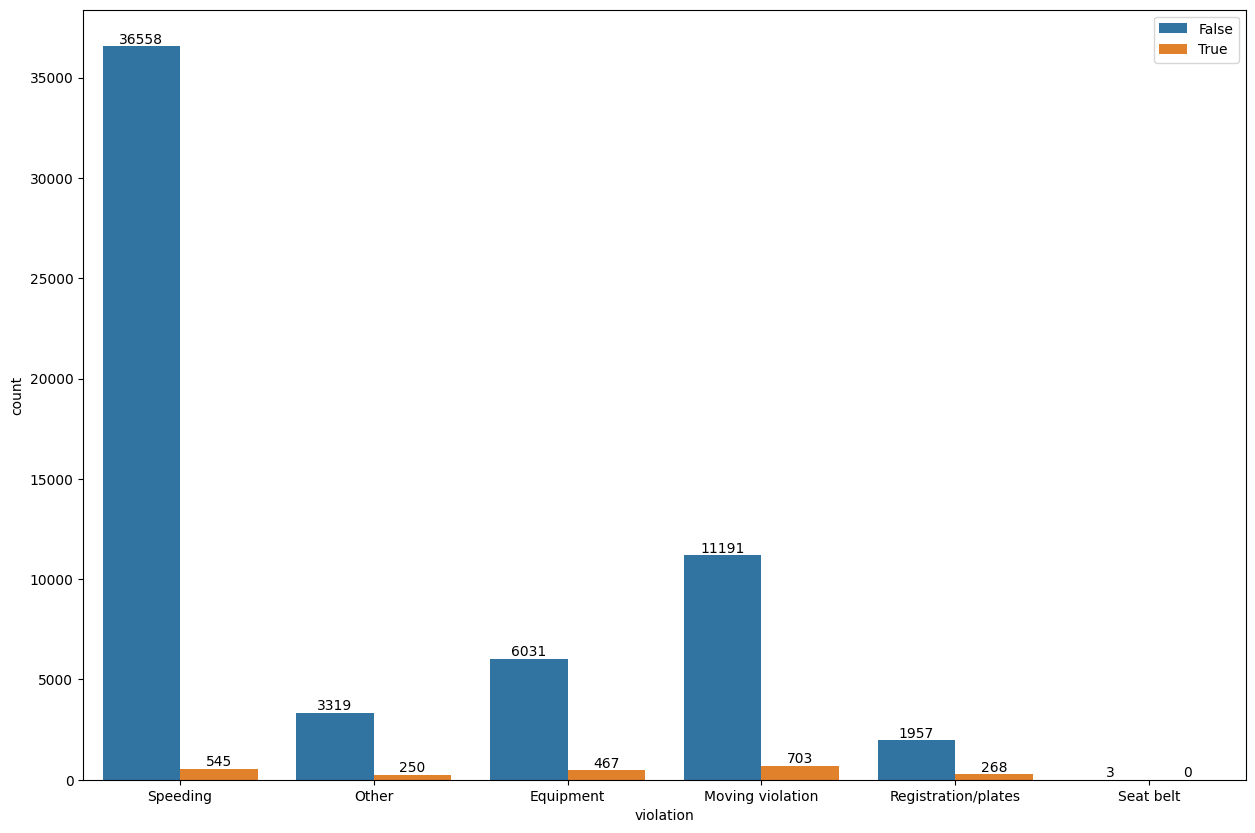

In [50]:
plt.figure(figsize = (15,10))
ax = sb.countplot(x = "violation",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 0)
for label in ax.containers:
    ax.bar_label(label)

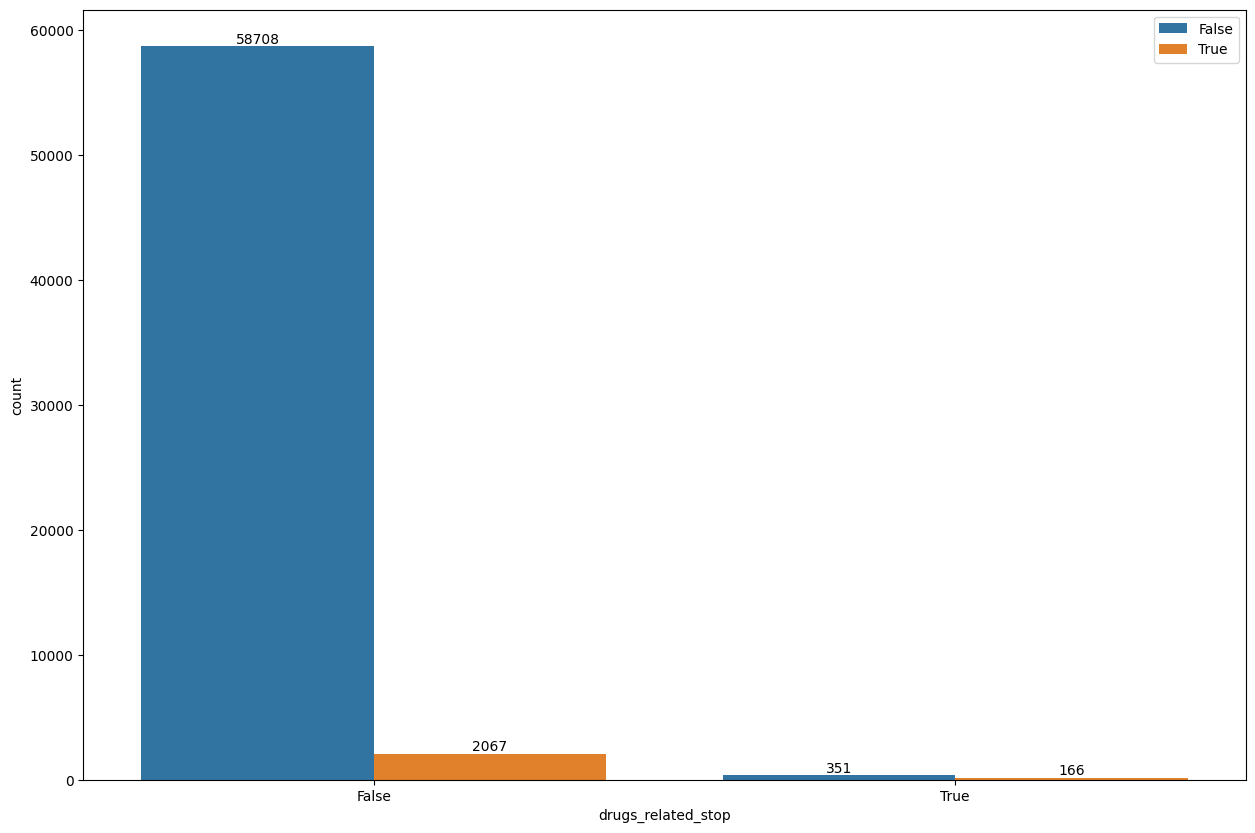

In [51]:
plt.figure(figsize = (15,10))
ax = sb.countplot(x = "drugs_related_stop",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 0)
for label in ax.containers:
    ax.bar_label(label)

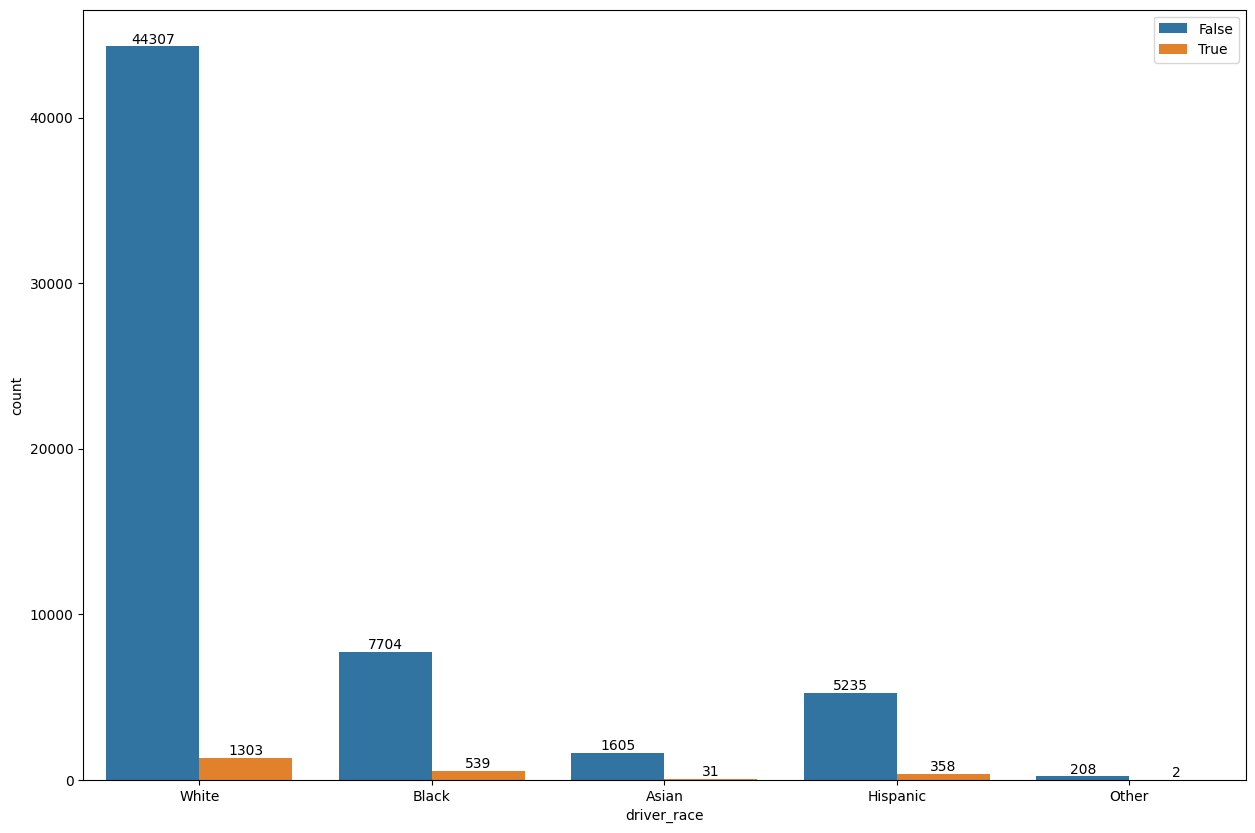

In [52]:
plt.figure(figsize = (15,10))
ax = sb.countplot(x = "driver_race",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 0)
for label in ax.containers:
    ax.bar_label(label)

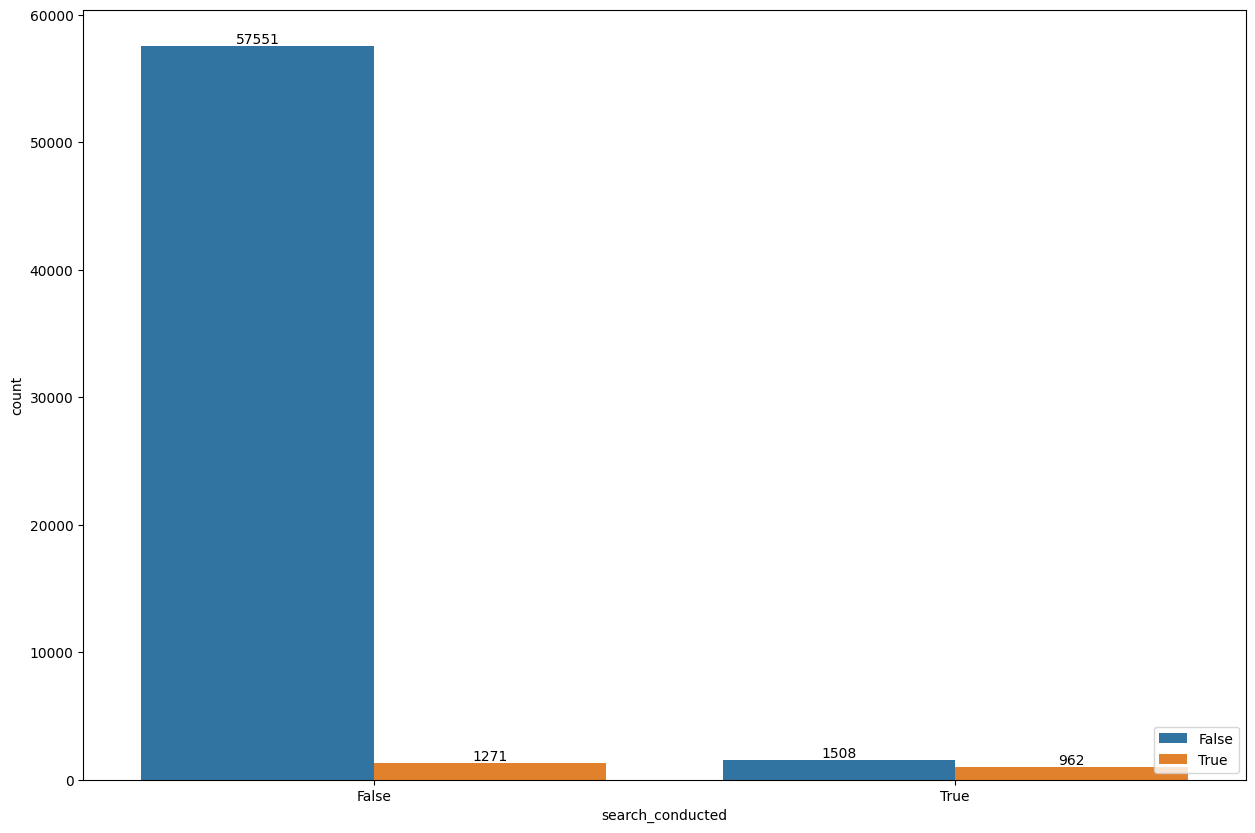

In [53]:
plt.figure(figsize = (15,10))
ax = sb.countplot(x = "search_conducted",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 4)
for label in ax.containers:
    ax.bar_label(label)

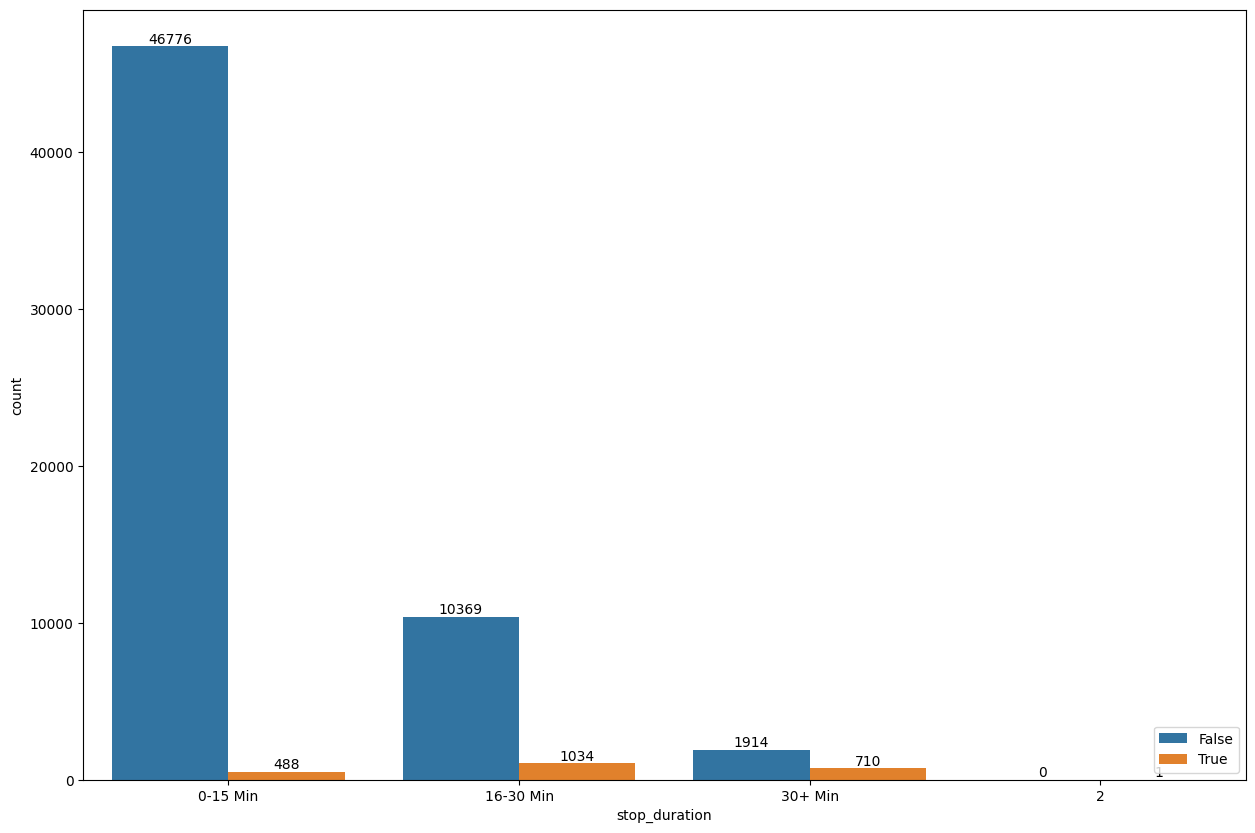

In [54]:
plt.figure(figsize = (15,10))
ax = sb.countplot(x = "stop_duration",hue = 'is_arrested', data = clean_data);
plt.legend(loc = 4)
for label in ax.containers:
    ax.bar_label(label)

In [55]:
clean_data[clean_data['drugs_related_stop'] == False].search_type.value_counts()

Incident to Arrest                                          982
Probable Cause                                              290
Inventory                                                   164
Reasonable Suspicion                                        125
Protective Frisk                                            113
Incident to Arrest,Inventory                                100
Incident to Arrest,Probable Cause                            43
Incident to Arrest,Protective Frisk                          29
Probable Cause,Reasonable Suspicion                          17
Incident to Arrest,Inventory,Probable Cause                  14
Probable Cause,Protective Frisk                              14
Inventory,Protective Frisk                                   11
Inventory,Probable Cause                                     10
Incident to Arrest,Inventory,Protective Frisk                10
Protective Frisk,Reasonable Suspicion                         8
Incident to Arrest,Probable Cause,Protec

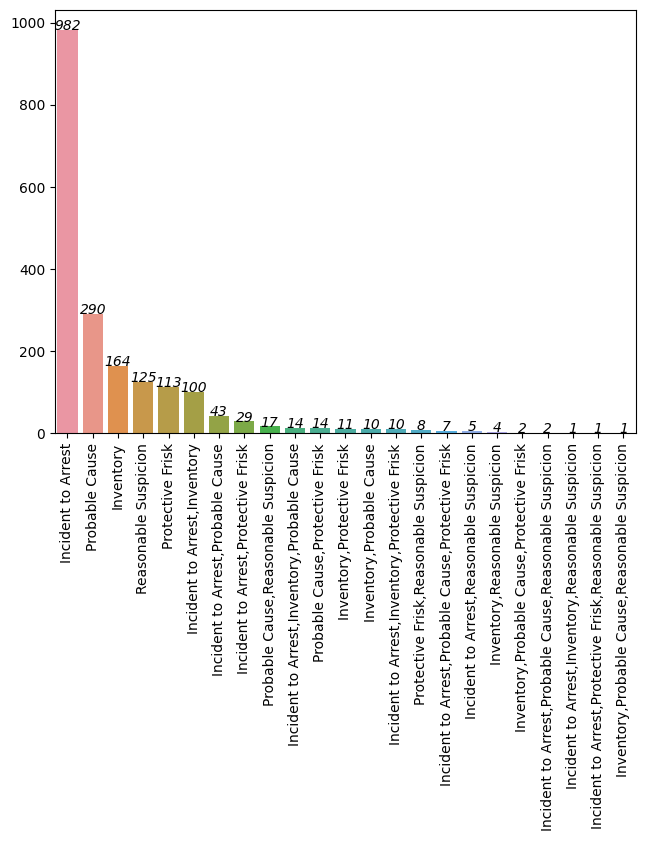

In [56]:
x_axis = clean_data[clean_data['drugs_related_stop'] == False].search_type.value_counts().index
y_axis = clean_data[clean_data['drugs_related_stop'] == False].search_type.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 90);
addLabels(x_axis, y_axis);

In [57]:
clean_data[clean_data['drugs_related_stop'] == False].search_conducted.value_counts()

False    62744
True      1953
Name: search_conducted, dtype: int64

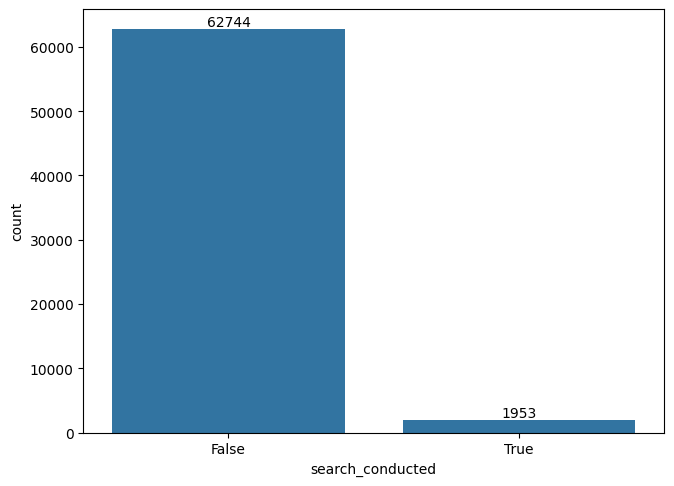

In [58]:
data = clean_data[clean_data['drugs_related_stop'] == False]
color = sb.color_palette()[0]
ax = sb.countplot(x = "search_conducted", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

In [59]:
clean_data[clean_data['drugs_related_stop'] == True].driver_gender.value_counts()

M    461
F     56
Name: driver_gender, dtype: int64

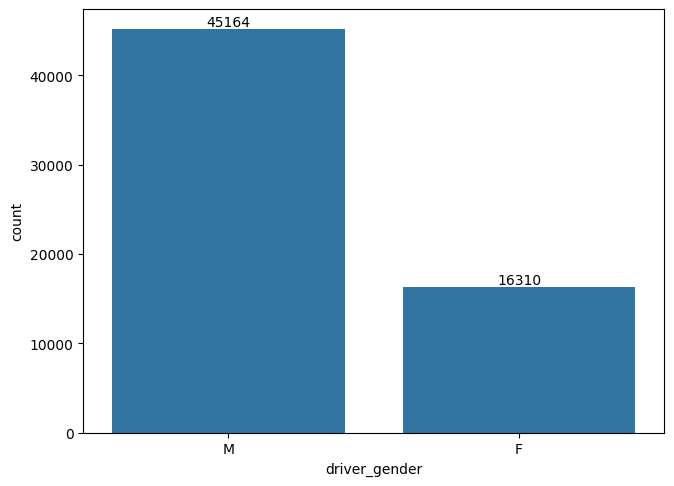

In [60]:
data = clean_data[clean_data['drugs_related_stop'] == True]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_gender", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)

In [61]:
clean_data[clean_data['drugs_related_stop'] == True].search_conducted.value_counts()

True    517
Name: search_conducted, dtype: int64

The result here shows that search was conducted for all the drug related stop.

In [62]:
clean_data[clean_data['drugs_related_stop'] == True].search_type.value_counts()

Probable Cause                                            288
Incident to Arrest                                         87
Incident to Arrest,Probable Cause                          35
Reasonable Suspicion                                       24
Probable Cause,Reasonable Suspicion                        21
Protective Frisk                                           12
Incident to Arrest,Inventory,Probable Cause                12
Probable Cause,Protective Frisk                             9
Inventory                                                   9
Inventory,Probable Cause                                    4
Incident to Arrest,Inventory                                4
Incident to Arrest,Reasonable Suspicion                     3
Incident to Arrest,Probable Cause,Protective Frisk          3
Protective Frisk,Reasonable Suspicion                       2
Incident to Arrest,Inventory,Protective Frisk               1
Incident to Arrest,Inventory,Reasonable Suspicion           1
Incident

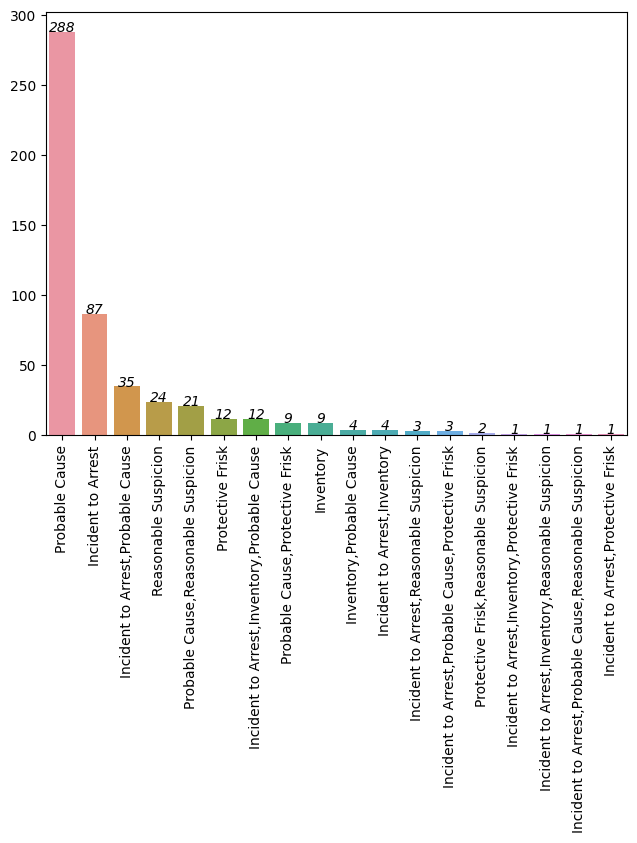

In [63]:
x_axis = clean_data[clean_data['drugs_related_stop'] == True].search_type.value_counts().index
y_axis = clean_data[clean_data['drugs_related_stop'] == True].search_type.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 90);
addLabels(x_axis, y_axis);

In [64]:
clean_data.stop_time = pd.to_datetime(clean_data.stop_time, format = '%H:%M', errors = 'ignore').dt.time

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_5080\1476811341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.stop_time = pd.to_datetime(clean_data.stop_time, format = '%H:%M', errors = 'ignore').dt.time


In [65]:
clean_data.sample(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
8720,2006-07-30,01:35:00,M,1974.0,32.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
51997,2011-08-27,02:26:00,M,1983.0,28.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
10526,2006-10-01,02:05:00,M,1972.0,34.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
13624,2007-01-13,08:50:00,F,1990.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6886,2006-05-27,09:25:00,M,1963.0,43.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
28987,2008-09-15,13:22:00,M,1984.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
4458,2006-03-06,00:15:00,M,1973.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
55743,2012-01-18,11:35:00,F,1993.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
33159,2009-03-11,02:03:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
39465,2010-01-08,00:16:00,M,1945.0,65.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [66]:
clean_data.driver_gender.value_counts()

M    45022
F    16269
Name: driver_gender, dtype: int64

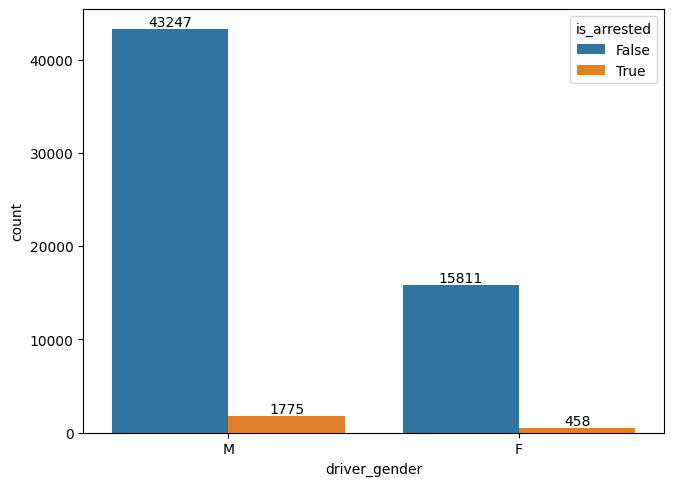

In [67]:
ax = sb.countplot(x = "driver_gender",hue = 'is_arrested', data = clean_data);
for label in ax.containers:
    ax.bar_label(label)

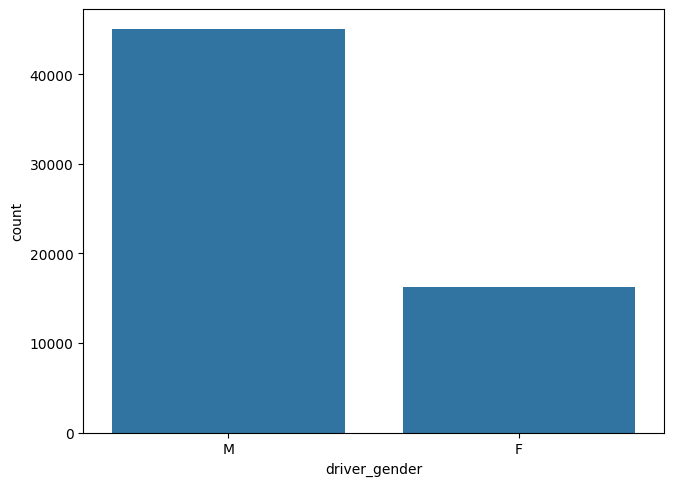

In [68]:
color = sb.color_palette()[0]
sb.countplot(x = "driver_gender", color = color, data = clean_data);

Let's look at the other fields. The describe() method will show us a summary of the numerical attributes in the dataset which are only two: driver_age_raw and driver_age. 

In [69]:
clean_data.describe()

,driver_age_raw,driver_age
count,61298.000000,61045.000000
mean,1967.768932,34.155525
std,121.228412,12.763762
min,0.000000,15.000000
25%,1965.000000,23.000000
50%,1978.000000,31.000000
75%,1985.000000,43.000000
max,8801.000000,88.000000


The count, mean, min and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of driver_age is 61228, not 65535 which is total number of rows in the dataset). The std row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a driver_age lower than 23, while 50% are lower than 31 and 75% are lower than 43. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

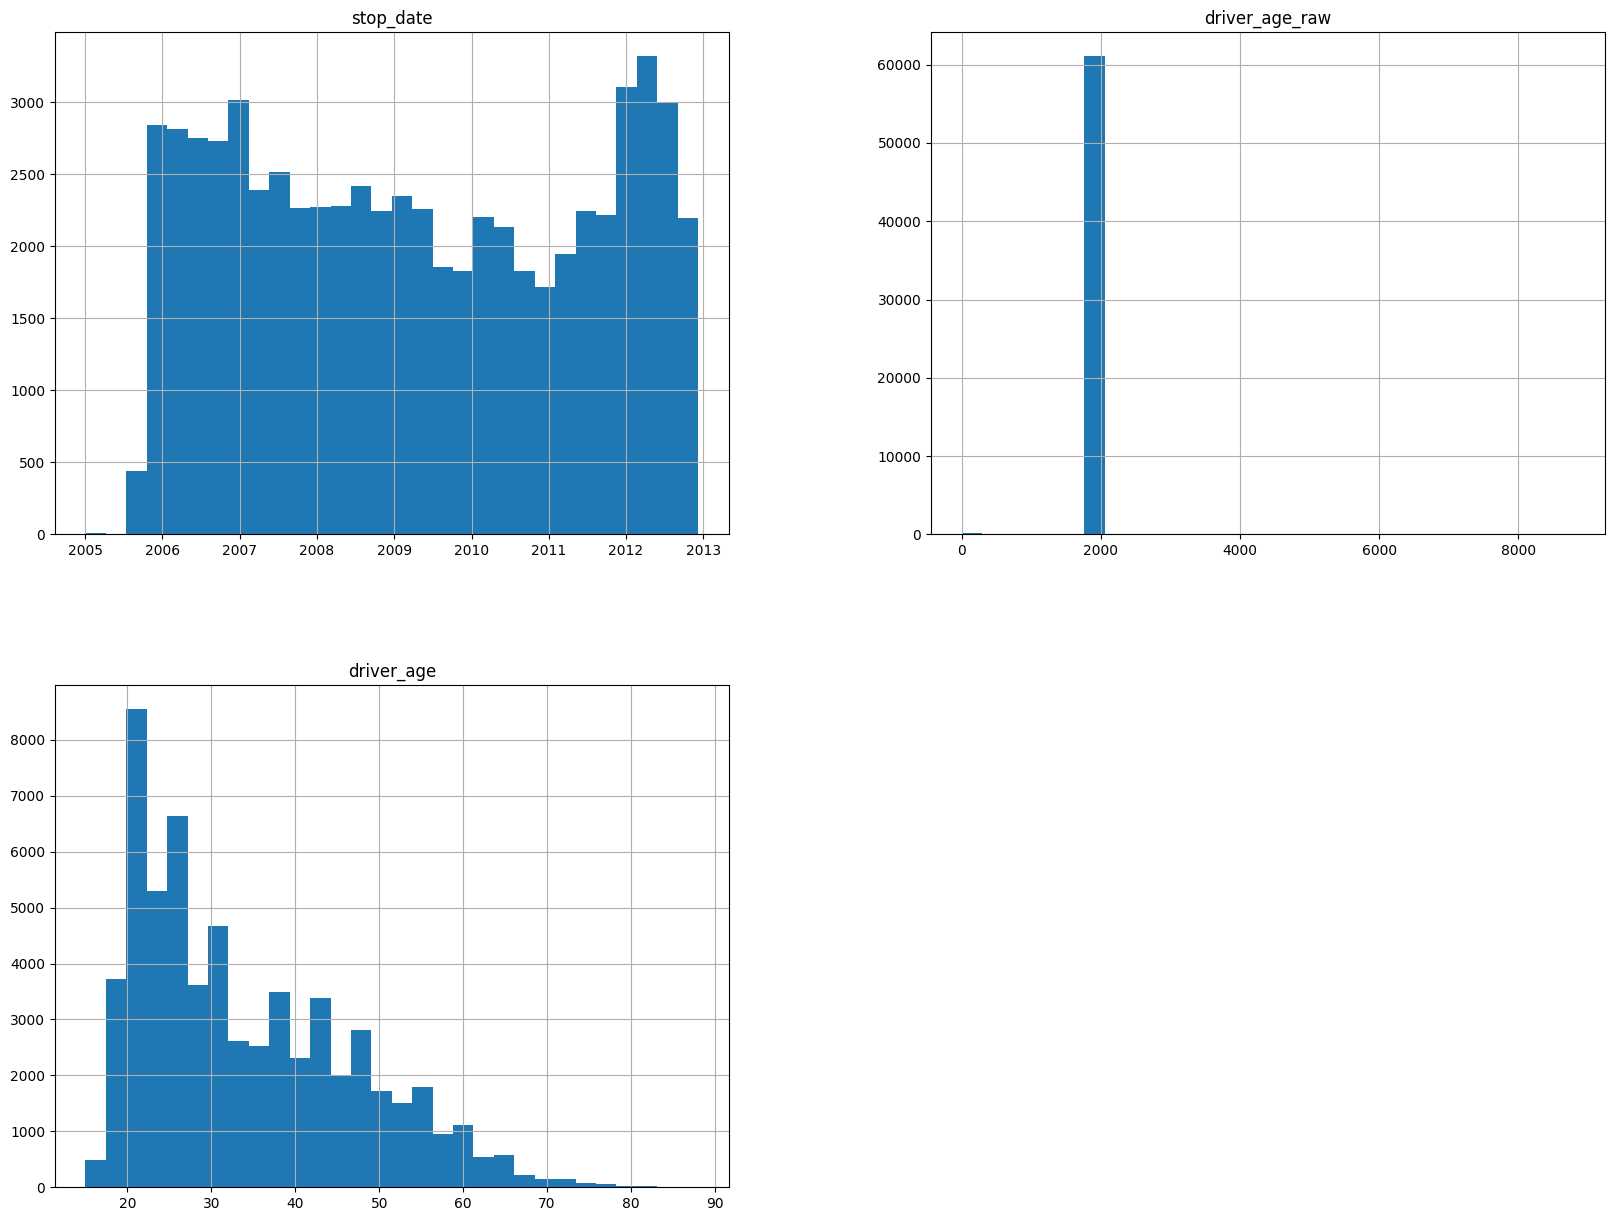

In [70]:
%matplotlib inline
clean_data.hist(bins = 30, figsize = (20,15));